In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
import pandas as pd

In [2]:
def savefig(filename, crop = True):
    plt.savefig('{}.pdf'.format(filename))
    plt.savefig('{}.eps'.format(filename))

In [3]:
today = '12/11/20' # Update this to include more data 
days = pd.date_range(start='1/22/20',end=today) 
dd = np.arange(len(days))
t = np.reshape(dd, [-1])

nd = 3000

Td = np.linspace(0,324,nd)

results0 = np.zeros((10,3000))
results0[0,:] = Td

In [4]:
#results0 = np.loadtxt("time.txt")
results1 = np.loadtxt("susceptible.txt")
results2 = np.loadtxt("infectd.txt")
results3 = np.loadtxt("INFasymp.txt")
results4 = np.loadtxt("recoverd.txt")
results5 = np.loadtxt("RECasymp.txt")

results6 = np.loadtxt("days.txt")
results6b = np.loadtxt("genDate.txt")
results7 = np.loadtxt("cases.txt")
results8 = np.loadtxt("wellness.txt")

results9 = np.loadtxt("rmse_train_loss.txt")

results10 = np.loadtxt("Beta.txt")
results12 = np.loadtxt("gamma.txt")
results13 = np.loadtxt("mu.txt")
results14 = np.loadtxt("q2.txt")
results15 = np.loadtxt("q3.txt")
results16 = np.loadtxt("q4.txt")


In [5]:
# All have this shape

print(results0.shape)
print(results1.shape)
print(results2.shape)
print(results3.shape)
print(results4.shape)
print(results5.shape)

print(results6.shape)
print(results7.shape)
print(results8.shape)

print(results9.shape)

print(results10.shape)
#print(results11.shape)
print(results12.shape)
print(results13.shape)

(10, 3000)
(10, 3000)
(10, 3000)
(10, 3000)
(10, 3000)
(10, 3000)
(325,)
(325,)
(325,)
(10, 400)
(10, 3000)
(10,)
(10,)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


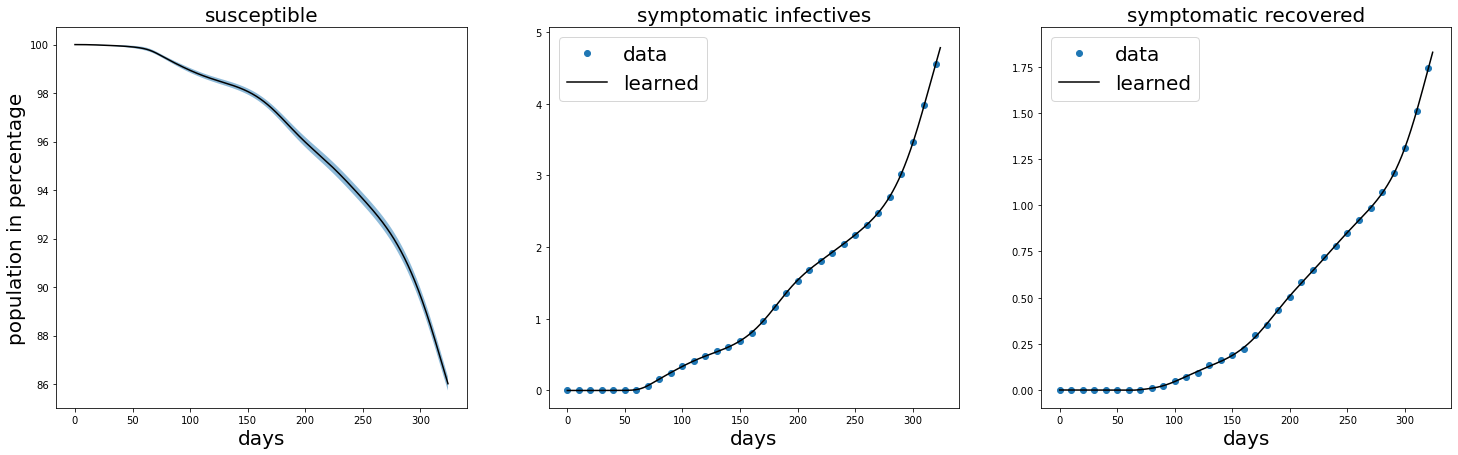

In [6]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(25, 7))

ax0.set_title('susceptible',fontsize = 20)
ax0.plot(results0[0,:],np.mean(results1,0),'k')
ax0.fill_between(results0[0,:],
 np.mean(results1,0)-(1.96*np.std(results1,0)/np.sqrt(results1.shape[0])),
 np.mean(results1,0)+(1.96*np.std(results1,0)/np.sqrt(results1.shape[0])),
 alpha=0.5)
#ax0.set_xticklabels(results6, fontsize=16)
ax0.set_xlabel('days',fontsize = 20)
ax0.set_ylabel('population in percentage',fontsize = 20)

ax1.set_title('symptomatic infectives',fontsize = 20)
ax1.plot(results6,results7,'o',markevery=10)
ax1.plot(results0[0,:],np.mean(results2,0),'k')
ax1.fill_between(results0[0,:],                 
 np.mean(results2,0)-(1.96*np.std(results2,0)/np.sqrt(results2.shape[0])),
 np.mean(results2,0)+(1.96*np.std(results2,0)/np.sqrt(results2.shape[0])),
 alpha=0.5)
ax1.set_xlabel('days',fontsize = 20)
ax1.legend(('data','learned'),loc='best',fontsize = 20)

ax2.set_title('symptomatic recovered',fontsize = 20)
ax2.plot(results6,results8,'o',markevery=10)
ax2.plot(results0[0,:],np.mean(results4,0),'k')
ax2.fill_between(results0[0,:],
 np.mean(results4,0)-(1.96*np.std(results4,0)/np.sqrt(results4.shape[0])),
 np.mean(results4,0)+(1.96*np.std(results4,0)/np.sqrt(results4.shape[0])),
 alpha=0.5)
ax2.set_xlabel('days',fontsize = 20)
ax2.legend(('data','learned'),loc='best',fontsize = 20)

savefig('./figures/usa_piecebeta_01')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


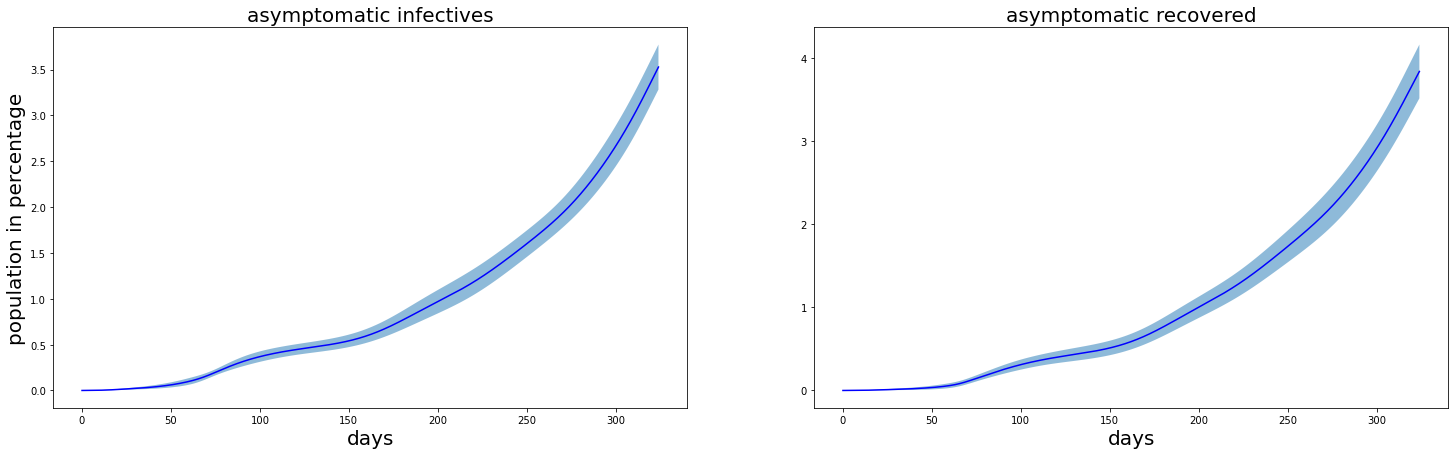

In [7]:
fig, (ax3, ax4) = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(25, 7))

ax3.set_title('asymptomatic infectives',fontsize = 20)
ax3.plot(results0[0,:],np.mean(results3,0),'b')
ax3.fill_between(results0[0,:],
 np.mean(results3,0)-(1.96*np.std(results3,0)/np.sqrt(results3.shape[0])),
 np.mean(results3,0)+(1.96*np.std(results3,0)/np.sqrt(results3.shape[0])),
 alpha=0.5)
ax3.set_xlabel('days',fontsize = 20)
ax3.set_ylabel('population in percentage',fontsize = 20)

ax4.set_title('asymptomatic recovered',fontsize = 20)
ax4.plot(results0[0,:],np.mean(results5,0),'b')
ax4.fill_between(results0[0,:],
 np.mean(results5,0)-(1.96*np.std(results5,0)/np.sqrt(results5.shape[0])),
 np.mean(results5,0)+(1.96*np.std(results5,0)/np.sqrt(results5.shape[0])),
 alpha=0.5)
ax4.set_xlabel('days',fontsize = 20)

savefig('./figures/usa_piecebeta_02')


In [8]:

R0 = np.zeros((10,3000))

for i in range(0,10):
    for j in range(0,3000):
        R0[i,j] = results10[i,j]*(0.49*results13[i] + (1-0.49)*results12[i])/(results13[i]*results12[i])



In [9]:
print(results1.shape)
c1 = np.zeros((10,325))
c2 = np.zeros((10,325))



(10, 3000)


In [10]:
import datetime
import matplotlib.dates as mdates
import pandas as pd
from scipy.interpolate import CubicSpline

days = pd.date_range(start='1/22/20',end='12/11/20') 
ddd = np.arange(len(days))

#print(dd)

for i in range(0,10):
    a1 = CubicSpline(results0[0,:],results10[i,:])
    a2 = CubicSpline(results0[0,:],R0[i,:])
    c1[i,:] = a1(ddd)
    c2[i,:] = a2(ddd)


# Generate some random date-time data
numdays1 = 325
base1 = datetime.date.fromisoformat('2020-01-20')
date_list1 = [base1 + datetime.timedelta(days=x) for x in range(0, numdays1)]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


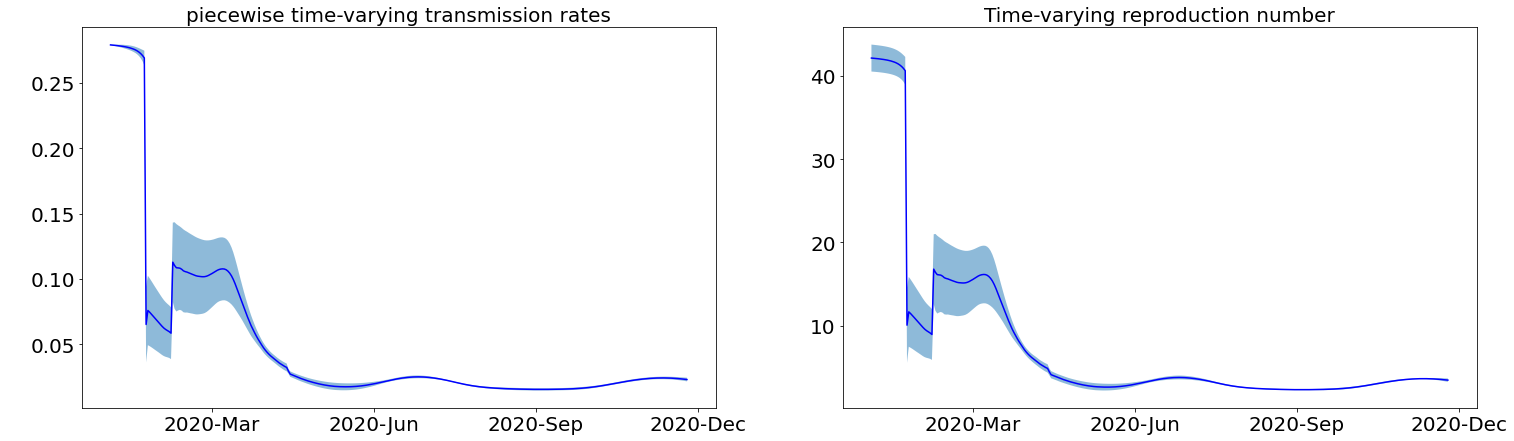

In [11]:
from datetime import datetime
from matplotlib.dates import date2num, DayLocator, DateFormatter

fig, (ax5,ax6) = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(25, 7))

ax5.set_title('piecewise time-varying transmission rates',fontsize = 20)
ax5.plot(date_list1,np.mean(c1,0),'b')
ax5.fill_between(date_list1,
 np.mean(c1,0)-(1.96*np.std(c1,0)/np.sqrt(c1.shape[0])),
 np.mean(c1,0)+(1.96*np.std(c1,0)/np.sqrt(c1.shape[0])),
 alpha=0.5)
ax5.xaxis.set_major_locator(DayLocator())
ax5.xaxis.set_major_formatter(DateFormatter('%Y-%b'))
ax5.xaxis.set_major_locator(mdates.WeekdayLocator(interval=13))
#ax5.set_xlabel('days',fontsize = 20)
ax5.set_ylabel(' ',fontsize = 20)
ax5.tick_params(labelsize=20)

ax6.set_title('Time-varying reproduction number',fontsize = 20)
ax6.plot(date_list1,np.mean(c2,0),'b')
ax6.fill_between(date_list1,
np.mean(c2,0)-(1.96*np.std(c2,0)/np.sqrt(c2.shape[0])),
np.mean(c2,0)+(1.96*np.std(c2,0)/np.sqrt(c2.shape[0])),
                 alpha=0.5)
ax6.xaxis.set_major_locator(DayLocator())
ax6.xaxis.set_major_formatter(DateFormatter('%Y-%b'))
ax6.xaxis.set_major_locator(mdates.WeekdayLocator(interval=13))
#ax6.set_xlabel('days',fontsize = 20)
ax6.tick_params(labelsize=20)

savefig('./figures/usa_piecebeta_03')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


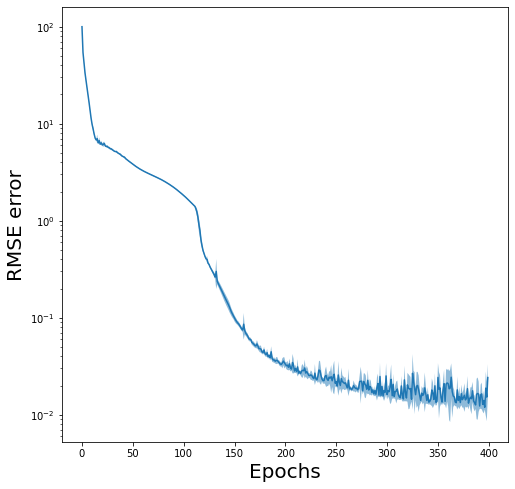

In [12]:
fig, ax5 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(8, 8))

ax5.semilogy(np.arange(0,results9.shape[1]),
 np.mean(results9,0))
ax5.fill_between(np.arange(0,results9.shape[1]),
 np.mean(results9,0)-(1.96*np.std(results9,0)/np.sqrt(results9.shape[0])),
 np.mean(results9,0)+(1.96*np.std(results9,0)/np.sqrt(results9.shape[0])),
 alpha=0.5)
ax5.set_xlabel('Epochs',fontsize = 20)
ax5.set_ylabel('RMSE error',fontsize = 20)

savefig('./figures/usa_piecebeta_04')


In [13]:
# mean and std of the parameters

#mean_eta = np.mean(results10)
#mean_xi = np.mean(results11)
mean_gamma = np.mean(results12)
mean_mu = np.mean(results13)
mean_q2 = np.mean(results14)
mean_q3 = np.mean(results15)
mean_q4 = np.mean(results16)

#std_beta = np.std(results10)
#std_xi = np.std(results11)
std_gamma = np.std(results12)
std_mu = np.std(results13)
std_q2 = np.std(results14)
std_q3 = np.std(results15)
std_q4 = np.std(results16)


In [14]:
# print(mean_eta)
# print(std_eta)

In [15]:
# print(mean_xi)
# print(std_xi)

In [16]:
print(mean_gamma)
print(std_gamma)

0.004596004999999999
0.00012923703434000643


In [17]:
print(mean_mu)
print(std_mu)

0.012022612999999998
0.0023858414704839466


In [18]:
print(mean_q2)
print(std_q2)

0.292976496
0.17052560449741752


In [19]:
print(mean_q3)
print(std_q3)

0.533696828
0.16459585464395668


In [20]:
print(mean_q4)
print(std_q4)

0.498332277
0.0758489594698746
